In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Plot stuff

### Pendulum

In [2]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.PendulumTest_res.csv')

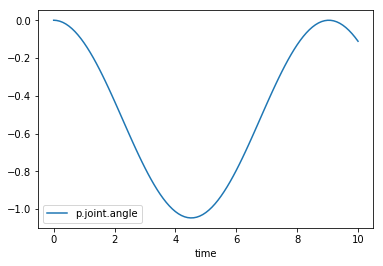

In [3]:
res[['time', 'p.joint.angle']].plot(x = 'time')

In [5]:
res[['time', 'p.joint.angle']].tail()

,time,p.joint.angle
99,9.7,-0.053521
100,9.8,-0.070613
101,9.9,-0.089891
102,10.0,-0.111270
103,10.0,-0.111270


### Single body rolling

In [50]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleBodyRollingTest_res.csv')

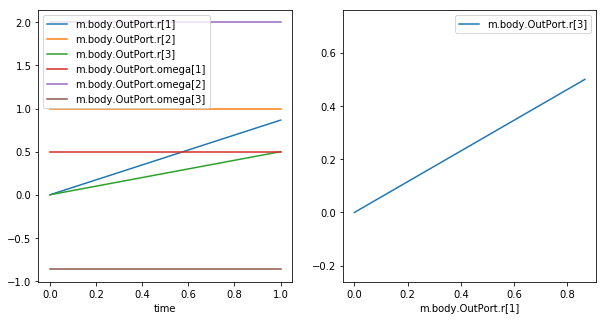

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[2]'
    , 'm.body.OutPort.r[3]'
    , 'm.body.OutPort.omega[1]'
    , 'm.body.OutPort.omega[2]'
    , 'm.body.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[3]'
    ]
].plot(x = 'm.body.OutPort.r[1]', ax = ax2)

### Single Roller Vertical Wheel

In [94]:
# !rm /home/vf/om/models/omni/tmp/MbsLite.Test.SingleRollerOmniWheelTest*

In [95]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleRollerOmniWheelTest_res.csv')

In [113]:
np.arccos(0.5)

1.0471975511965979

In [137]:
df = res[
    [ 'time'
    , 'wheel.wheel.OutPortK.T[1,1]'
    , 'wheel.wheel.OutPortK.T[1,2]'
    , 'wheel.wheel.OutPortK.T[1,3]'
    ]
]
df = df.assign(
    **{ 'wheel.selfRot' : df.apply(lambda row: np.arccos(row['wheel.wheel.OutPortK.T[1,1]']) * 180/np.pi, axis = 1) }
)

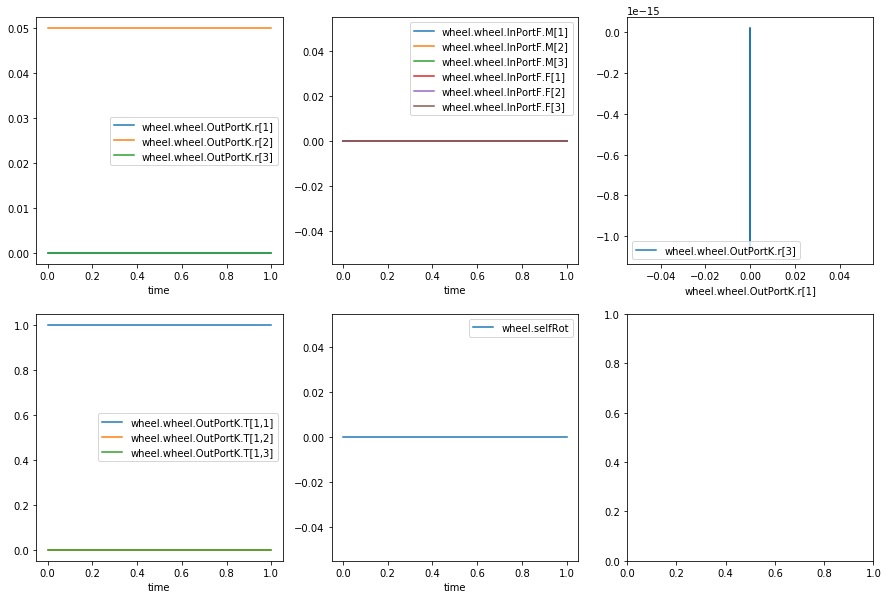

In [143]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[2]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

res[
    [ 'time'
    , 'wheel.wheel.InPortF.M[1]'
    , 'wheel.wheel.InPortF.M[2]'
    , 'wheel.wheel.InPortF.M[3]'
    , 'wheel.wheel.InPortF.F[1]'
    , 'wheel.wheel.InPortF.F[2]'
    , 'wheel.wheel.InPortF.F[3]'
    ]
].plot(x = 'time', ax = axs[0][1])

ax2.axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = axs[0][2])

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.T[1,1]'
    , 'wheel.wheel.OutPortK.T[1,2]'
    , 'wheel.wheel.OutPortK.T[1,3]'
    ]
].plot(x = 'time', ax = axs[1][0])

df[
    [ 'time'
    , 'wheel.selfRot'
    ]
].plot(x = 'time', ax = axs[1][1])

### Vertical Wheel

In [52]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.OmniWheelTest_res.csv')

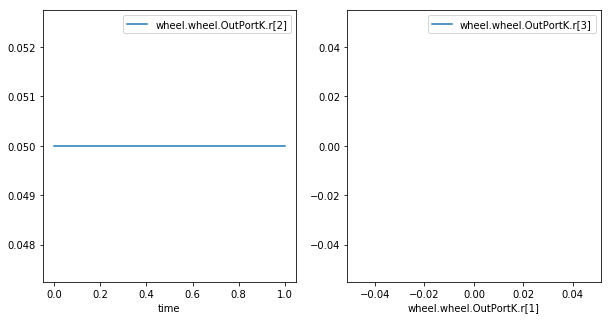

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[2]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = ax2)

# OM

In [ ]:
import OMPython
from OMPython import OMCSessionZMQ

In [ ]:
help(OMPython)

In [2]:
omc = OMCSessionZMQ()

2018-09-15 11:37:09,526 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.0f9aeff4836b415db2f5d0b70a221f1d pid=22247


In [3]:
omc.sendExpression("cd()")

'/home/vf/om/models/omni'

In [7]:
omc.sendExpression('cd("tmp")')
omc.sendExpression("cd()")

'/home/vf/om/models/omni/tmp'

In [4]:
omc.sendExpression('loadModel(Modelica)')

True

In [5]:
root = '/home/vf/om/models/omni/thin/MBS'
path_MBS = root + '/package.mo'
path_MBS_Basics = root + '/Basics.mo'
paths = [
    path_MBS,
    path_MBS_Basics,
]
display(paths)

['/home/vf/om/models/omni/thin/MBS/package.mo',
 '/home/vf/om/models/omni/thin/MBS/Basics.mo']

In [12]:
omc.sendExpression('loadFile("' + path_MBS + '")')

False

In [ ]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [ ]:
sim

In [ ]:
!mv {sim['resultFile']} .

In [ ]:
ls

In [ ]:
res = pd.read_csv('A_res.csv')

In [ ]:
res.hist()

In [ ]:
res['x'].plot()

In [ ]:
res['der(x)'].plot()